# Simple Linear Regression Algorithm

In [144]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [145]:
learning_rate = 0.01
epochs = 100

In [146]:
constant = randint(0, 100)
print(constant)
x_training_data = np.linspace(-1, 1, epochs)
y_training_data = 2 * x_training_data + np.random.randn(*x_training_data.shape) + constant

93


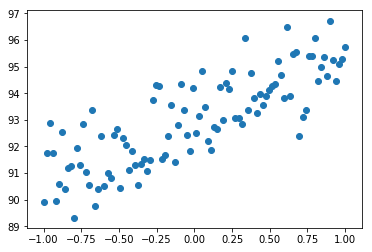

In [147]:
plt.scatter(x_training_data, y_training_data)

In [169]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [170]:
model_func = lambda m, x, c : tf.add(tf.multiply(m, x), c)

In [171]:
m = tf.Variable(0.0, name="gradient")
c = tf.Variable(0.0, name="constant")

In [172]:
y_model = model_func(m, X, c)
cost = tf.square(Y-y_model)
cost = tf.Print(cost, [cost], "loss: ")

In [173]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
model = tf.global_variables_initializer()

In [174]:
with tf.Session() as sess:
    sess.run(model)
    errors = []
    for iteration in range(epochs):
        for (x, y) in zip(x_training_data, y_training_data):
            _, error = sess.run([train_op, cost], feed_dict={X: x, Y: y})
            errors.append(error)
    m = sess.run(m)
    c = sess.run(c)

In [175]:
print(m, c)
print(errors)

2.4138682 92.99946
[8087.176, 7776.228, 7384.357, 6658.088, 5910.061, 5602.4526, 5516.172, 4859.1147, 4671.328, 4403.2964, 3903.3489, 4011.7952, 3721.8628, 3717.656, 3325.0886, 3111.4807, 3290.491, 2753.6206, 2708.8816, 2811.3665, 2514.3684, 2470.8628, 2371.1875, 2451.2656, 2397.795, 2117.0393, 2233.826, 2148.7295, 2012.5312, 2026.4078, 1935.1609, 1832.1318, 1864.2179, 1843.7678, 1775.3536, 1779.9255, 1947.6547, 1966.0559, 1930.6168, 1670.7279, 1662.6558, 1701.9799, 1777.1307, 1581.517, 1679.4873, 1789.8538, 1686.4149, 1595.2711, 1532.0217, 1708.9146, 1556.9705, 1594.4585, 1716.1361, 1590.2998, 1474.1708, 1436.5518, 1492.7043, 1471.676, 1581.5974, 1469.5099, 1560.3868, 1526.5326, 1561.5259, 1407.6471, 1390.5177, 1356.1113, 1587.6044, 1354.8369, 1439.9678, 1346.5541, 1286.0217, 1316.6062, 1263.5575, 1265.3215, 1257.7411, 1243.0638, 1219.8514, 1254.3396, 1188.1676, 1100.717, 1256.4962, 1045.4614, 1119.4592, 1093.475, 864.51355, 881.2734, 867.385, 961.10504, 927.62427, 932.502, 802.39233,

/Users/rajatrasal/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/rajatrasal/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


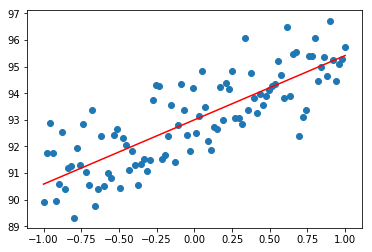

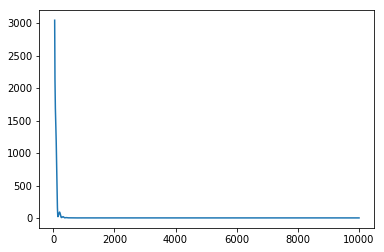

In [176]:
plt.figure(1)
plt.subplot()
plt.scatter(x_training_data, y_training_data)
y_learned = (x_training_data * m) + c
plt.plot(x_training_data, y_learned, 'r')

plt.figure(2)
plt.subplot()
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])

plt.show()